In [72]:
import pandas as pd
import numpy as np
import allel
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')

In [3]:
with open('VCF/control.filt.vcf', mode='r') as vcf:
    control_data = vcf.read()

In [4]:
with open('VCF/test.filt.vcf', mode='r') as vcf:
    for line
    test_data = vcf.read()

In [13]:
print(allel.__version__)

1.2.1


In [14]:
# collection of NumPy arrays
callset = allel.read_vcf('VCF/control.filt.vcf')

In [112]:
# collection of NumPy arrays
callset_test = allel.read_vcf('VCF/test.filt.vcf')

In [15]:
sorted(callset.keys())

['calldata/GT',
 'samples',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/POS',
 'variants/QUAL',
 'variants/REF']

In [16]:
callset['samples']

array(['STAR_OUT/ST_RNA01.sorted.bam', 'STAR_OUT/ST_RNA02.sorted.bam',
       'STAR_OUT/ST_RNA03.sorted.bam', 'STAR_OUT/ST_RNA04.sorted.bam',
       'STAR_OUT/ST_RNA05.sorted.bam', 'STAR_OUT/ST_RNA06.sorted.bam',
       'STAR_OUT/ST_RNA07.sorted.bam', 'STAR_OUT/ST_RNA08.sorted.bam'],
      dtype=object)

In [26]:
callset['variants/CHROM'][:5]

array(['chr1', 'chr1', 'chr1', 'chr1', 'chr1'], dtype=object)

In [25]:
callset['variants/POS'][:5]

array([12383, 14574, 14599, 14604, 14610], dtype=int32)

In [24]:
callset['variants/QUAL'][:5]

array([ 8.33747, 11.4463 ,  8.50874, 35.9719 , 49.9073 ], dtype=float32)

In [23]:
callset['calldata/GT'][:2]

array([[[1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 1],
        [0, 0],
        [1, 1],
        [0, 0]]], dtype=int8)

In [27]:
# create genotype array
gt = allel.GenotypeArray(callset['calldata/GT'])

In [30]:
gt[:5]

,0,1,2,3,4,5,6,7
0,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
1,1/1,0/0,0/0,0/0,1/1,0/0,1/1,0/0
2,1/1,0/0,0/0,0/0,1/1,0/0,1/1,0/0
3,1/1,0/0,0/0,0/0,1/1,0/0,1/1,0/0
4,1/1,0/0,0/0,0/0,1/1,0/0,1/1,0/0


In [32]:
# identify heterozygous genotype calls
gt.is_het()[:5]

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [35]:
# count heterozygous calls
# variants (axis=0) or samples (axis=1)
gt.count_het(axis=1)[:5]

array([0, 0, 0, 0, 0])

In [37]:
# allele count
# --> (0=reference, 1=first alternate, 2=second alternate, etc.)
ac = gt.count_alleles()
ac[:5]

,0,1,2,3
0,0,16,0,0
1,10,6,0,0
2,10,6,0,0
3,10,6,0,0
4,10,6,0,0


In [38]:
# selective import by fields
# DP = combined depth across samples
subset = allel.read_vcf('VCF/control.filt.vcf', 
                        fields=['variants/DP', 'calldata/DP'])
sorted(subset.keys())

['calldata/DP', 'variants/DP']

In [39]:
# DP field from within the INFO field
subset['variants/DP'][:5]

array([ 24, 875, 661, 651, 650], dtype=int32)

In [40]:
# DP field from call data
subset['calldata/DP'][:5]

array([[-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1]], dtype=int16)

In [41]:
# import everything
callset = allel.read_vcf('VCF/control.filt.vcf', fields='*')
sorted(callset.keys())

['calldata/GT',
 'calldata/PL',
 'samples',
 'variants/AC',
 'variants/ALT',
 'variants/AN',
 'variants/BQB',
 'variants/CHROM',
 'variants/DP',
 'variants/DP4',
 'variants/FILTER_LowQual',
 'variants/FILTER_PASS',
 'variants/HOB',
 'variants/ICB',
 'variants/ID',
 'variants/IDV',
 'variants/IMF',
 'variants/INDEL',
 'variants/MQ',
 'variants/MQ0F',
 'variants/MQB',
 'variants/MQSB',
 'variants/POS',
 'variants/QUAL',
 'variants/REF',
 'variants/RPB',
 'variants/SGB',
 'variants/altlen',
 'variants/is_snp',
 'variants/numalt']

In [45]:
subset = allel.read_vcf('VCF/control.filt.vcf', 
                        fields=['ALT', 'AF'], alt_number=2)

In [74]:
subset['variants/ALT'][:5]

array([['A', ''],
       ['G', ''],
       ['A', ''],
       ['G', ''],
       ['C', '']], dtype=object)

In [113]:
# create pandas from call data
df_call = allel.vcf_to_dataframe('VCF/test.filt.vcf', fields='*')
df_call[:5]

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,INDEL,IDV,...,DP4_3,DP4_4,MQ,FILTER_PASS,FILTER_LowQual,numalt,altlen_1,altlen_2,altlen_3,is_snp
0,chr1,12774,.,G,T,NaN,NaN,7.41173,False,-1,...,3,2,3,False,True,1,0,0,0,True
1,chr1,14464,.,A,T,NaN,NaN,5.53938,False,-1,...,43,0,3,False,True,1,0,0,0,True
2,chr1,14653,.,C,T,NaN,NaN,154.00000,False,-1,...,119,6,12,False,True,1,0,0,0,True
3,chr1,14671,.,G,C,NaN,NaN,18.35780,False,-1,...,20,4,14,False,True,1,0,0,0,True
4,chr1,15189,.,C,T,NaN,NaN,127.00000,False,-1,...,11,6,15,True,False,1,0,0,0,True


In [114]:
# query pandas
df_sub = df_call.query('DP > 10 and QUAL > 20 and FILTER_PASS == True')

In [115]:
df_sub[:5]

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,INDEL,IDV,...,DP4_3,DP4_4,MQ,FILTER_PASS,FILTER_LowQual,numalt,altlen_1,altlen_2,altlen_3,is_snp
4,chr1,15189,.,C,T,NaN,NaN,127.0000,False,-1,...,11,6,15,True,False,1,0,0,0,True
5,chr1,15204,.,C,A,NaN,NaN,215.0000,False,-1,...,14,9,16,True,False,1,0,0,0,True
6,chr1,15274,.,A,T,NaN,NaN,24.6875,False,-1,...,9,2,6,True,False,1,0,0,0,True
13,chr1,22113,.,T,G,NaN,NaN,233.0000,False,-1,...,17,5,18,True,False,1,0,0,0,True
14,chr1,22158,.,A,G,NaN,NaN,66.0000,False,-1,...,8,0,9,True,False,1,0,0,0,True


In [70]:
# export df 
df_sub.to_csv('VCF/vcf_subset_filterPASS.csv', 
              index = None, 
              header = True)

In [66]:
# export from vcg file
allel.vcf_to_csv('VCF/control.filt.vcf', 
                 'VCF/vcf_fields.csv', 
                 fields=['CHROM', 
                         'POS', 
                         'DP', 
                         'REF', 
                         'ALT', 
                         'FILTER_PASS'])

In [78]:
pos = df_sub['POS']

In [79]:
pos[:5]

7     14930
8     15189
9     15204
10    15274
22    20166
Name: POS, dtype: int64

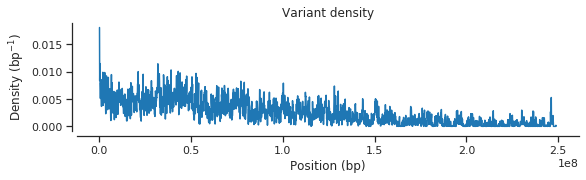

In [80]:
# density of variants over the entire genome
bin_width = 100000
bins = np.arange(0, pos.max(), bin_width)
# set X coordinate as bin midpoints
x = (bins[1:] + bins[:-1])/2
# compute variant density
h, _ = np.histogram(pos, bins=bins)
y = h / bin_width
# plot
fig, ax = plt.subplots(figsize=(9, 2))
sns.despine(ax=ax, offset=5)
ax.plot(x, y)
ax.set_xlabel('Position (bp)')
ax.set_ylabel('Density (bp$^{-1}$)')
ax.set_title('Variant density');

In [81]:
# subset to chromosome 1
df_chr1 = df_sub.loc[df_sub['CHROM'] == 'chr1']

In [82]:
df_chr1[:5]

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,INDEL,IDV,...,DP4_3,DP4_4,MQ,FILTER_PASS,FILTER_LowQual,numalt,altlen_1,altlen_2,altlen_3,is_snp
7,chr1,14930,.,A,G,NaN,NaN,40.281601,False,-1,...,5,1,13,True,False,1,0,0,0,True
8,chr1,15189,.,C,T,NaN,NaN,381.000000,False,-1,...,24,14,15,True,False,1,0,0,0,True
9,chr1,15204,.,C,A,NaN,NaN,420.000000,False,-1,...,25,15,16,True,False,1,0,0,0,True
10,chr1,15274,.,A,T,NaN,NaN,22.252300,False,-1,...,10,4,4,True,False,1,0,0,0,True
22,chr1,20166,.,A,G,NaN,NaN,24.358000,False,-1,...,13,0,14,True,False,1,0,0,0,True


In [83]:
pos_chr1 = df_chr1['POS']

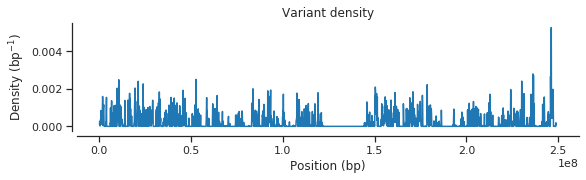

In [84]:
# density of variants over the CHR1
bin_width = 100000
bins = np.arange(0, pos_chr1.max(), bin_width)
# set X coordinate as bin midpoints
x = (bins[1:] + bins[:-1])/2
# compute variant density
h, _ = np.histogram(pos_chr1, bins=bins)
y = h / bin_width
# plot
fig, ax = plt.subplots(figsize=(9, 2))
sns.despine(ax=ax, offset=5)
ax.plot(x, y)
ax.set_xlabel('Position (bp)')
ax.set_ylabel('Density (bp$^{-1}$)')
ax.set_title('Variant density');

In [116]:
# subset to chromosome 22
df_chr22 = df_sub.loc[df_sub['CHROM'] == 'chr22']

In [117]:
df_chr22[:5]

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,INDEL,IDV,...,DP4_3,DP4_4,MQ,FILTER_PASS,FILTER_LowQual,numalt,altlen_1,altlen_2,altlen_3,is_snp
26339,chr22,10950118,.,T,C,NaN,NaN,250.0,False,-1,...,11,9,17,True,False,1,0,0,0,True
26341,chr22,10950164,.,C,T,NaN,NaN,191.0,False,-1,...,8,6,17,True,False,1,0,0,0,True
26360,chr22,10959121,.,T,G,NaN,NaN,229.0,False,-1,...,6,12,17,True,False,1,0,0,0,True
26361,chr22,10959122,.,T,C,NaN,NaN,246.0,False,-1,...,6,12,17,True,False,1,0,0,0,True
26370,chr22,11251795,.,A,G,NaN,NaN,59.0,False,-1,...,5,2,7,True,False,1,0,0,0,True


In [118]:
pos_chr22 = allel.SortedIndex(df_chr22['POS'])

In [119]:
pos_chr22[:5]

0,1,2,3,4
10950118,10950164,10959121,10959122,11251795


In [120]:
# gene of interest: GNAZ - chr22:23070519-23125032
start, stop = 23070519, 23125032
loc_GNAZ = pos_chr22.locate_range(start, stop)
loc_GNAZ

slice(2867, 2908, None)

In [122]:
# use the slice to load genotype data for the region of interest
g_GNAZ = allel.GenotypeArray(callset_test['calldata/GT'][loc_GNAZ])

In [123]:
g_GNAZ

<GenotypeArray shape=(41, 8, 2) dtype=int8>
./. 0/1 ./. ./. 1/1 ./. ./. ./.
./. ./. ./. 1/1 1/1 ./. ./. ./.
./. ./. ./. 1/1 1/1 ./. ./. ./.
...
1/1 1/1 ./. 1/1 1/1 1/1 1/1 1/1
./. 1/1 1/1 ./. ./. 1/1 1/1 ./.
./. 1/1 1/1 ./. ./. 1/1 1/1 1/1

In [124]:
# convert to the number of alternate alleles per call
gn_GNAZ = g_GNAZ.to_n_alt()
gn_GNAZ

array([[0, 1, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 2, 2, 1, 0, 0],
       [0, 0, 0, 2, 2, 1, 2, 0],
       [0, 0, 0, 2, 1, 1, 2, 0],
       [0, 0, 0, 0, 2, 2, 1, 0],
       [0, 2, 2, 0, 2, 0, 0, 0],
       [0, 2, 2, 1, 2, 0, 1, 0],
       [0, 2, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 2, 2, 0, 0, 2],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 2, 0, 2, 2],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 1, 2],
       [0, 2, 0, 0, 2, 0, 2, 1],
       [0, 0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 1, 0, 2, 1],
       [0, 0, 0, 2, 2, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0],
       [0,

In [125]:
# compute genetic distance between each pair of individuals
dist_GNAZ = allel.pairwise_distance(gn_GNAZ, metric='euclidean')
dist_GNAZ

array([6.78232998, 5.        , 7.48331477, 9.2736185 , 4.35889894,
       6.63324958, 4.79583152, 5.19615242, 9.2736185 , 9.69535971,
       6.40312424, 6.78232998, 7.        , 8.66025404, 9.74679434,
       4.47213595, 6.8556546 , 6.32455532, 7.21110255, 7.93725393,
       7.48331477, 7.41619849, 9.32737905, 8.24621125, 8.66025404,
       5.91607978, 5.83095189, 5.91607978])

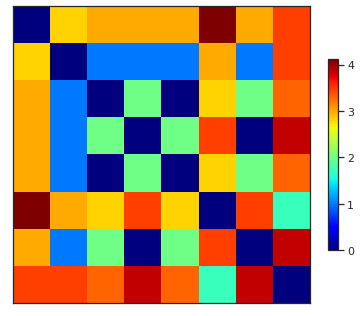

In [111]:
# control
allel.plot_pairwise_distance(dist_GNAZ);

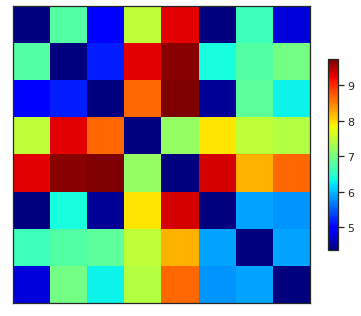

In [126]:
# test
allel.plot_pairwise_distance(dist_GNAZ);